In [1]:
# Import all necesseary libraries
import numpy as np
import pandas as pd
import importlib
import random
from tqdm import tqdm
import datetime
import geopandas as gpd

pd.set_option('display.max_columns', None)

In [2]:
# Import st_toolkit.py file
# Reload the imported file in case any changes are made to it instead of restarting python interpreter
import st_toolkit as geohl
importlib.reload(geohl)

<module 'st_toolkit' from 'C:\\Users\\kka\\Documents\\intern_run\\st_toolkit.py'>

In [3]:
# reading July dataset
df_temp = pd.read_csv('unipi_ais_dynamic_jul2018.csv')

In [4]:
# select July 12, 2018 data only
# timestamp 1531353600000 = 12/7/2018 00:00:00 and timestamp 1531439995000 = 12/7/2018 23:59:55 in milliseconds
df = df_temp.loc[df_temp.timestamp.between(1531353600000, 1531439995000, inclusive='both')].copy()

In [5]:
# add new column with the timestamp in datetime format
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

In [6]:
df

,timestamp,vessel_id,lon,lat,heading,speed,course,datetime
4184629,1531402452000,40a3fa0c26f0a2f4f5387889c44e43a27d72491ec3f53c...,23.683138,37.930732,211.0,0.1,344.6,2018-07-12 13:34:12
4184630,1531402452000,baa645767e759f76e9c6afd01c7e583e9aad4f49800398...,23.510622,37.855623,251.0,0.1,329.5,2018-07-12 13:34:12
4184631,1531402452000,dadfa579a00bdb0f7180f6fde15af0190a489ab4e445c3...,23.556210,37.963807,NaN,0.0,0.0,2018-07-12 13:34:12
4184632,1531402452000,daea62ae85efd9f8dd4ef4f3ea458c75aa68bb021110eb...,23.647330,37.931848,102.0,0.0,264.3,2018-07-12 13:34:12
4184633,1531402452000,ec6bbf8756fe7a6f77bf4440c62f25ade847439dae44d4...,23.605550,37.959050,223.0,0.0,139.0,2018-07-12 13:34:12
...,...,...,...,...,...,...,...,...
5153661,1531429203000,3fc28f4d2b3c7cb5f68d5b71f6fda727e4f8cd66515d98...,23.619285,37.936162,28.0,12.2,12.8,2018-07-12 21:00:03
5153662,1531429203000,3153ae7391c9841540b3672e610e747942a8d0d30b7875...,23.556262,37.963742,NaN,0.0,NaN,2018-07-12 21:00:03
5153663,1531429204000,6c15919b028c3b467ff183dab2acd8a3e9b015bbe912eb...,23.537402,37.827490,93.0,8.8,94.3,2018-07-12 21:00:04
5153664,1531429204000,29b2c240d3ee158281fb4ad556939ee938d08685bd796a...,23.614913,37.944775,NaN,0.0,325.4,2018-07-12 21:00:04


In [7]:
# rename vessel_id to mmsi
df.rename(columns={'vessel_id': 'mmsi'}, inplace=True)

In [8]:
list(df)

['timestamp', 'mmsi', 'lon', 'lat', 'heading', 'speed', 'course', 'datetime']

In [9]:
# check for missing values in all columns of the dataset
if df.isna().any().any():
    print("Missing values found:")
    if df['timestamp'].isna().any():
        print(f"timestamp column has {df['timestamp'].isna().sum()} missing values.")
    if df['mmsi'].isna().any():
        print(f"mmsi column has {df['mmsi'].isna().sum()} missing values.")
    if df['lon'].isna().any():
        print(f"lon column has {df['lon'].isna().sum()} missing values.")
    if df['lat'].isna().any():
        print(f"lat column has {df['lat'].isna().sum()} missing values.")
    if df['heading'].isna().any():
        print(f"heading column has {df['heading'].isna().sum()} missing values.")
    if df['speed'].isna().any():
        print(f"speed column has {df['speed'].isna().sum()} missing values.")
    if df['course'].isna().any():
        print(f"course column has {df['course'].isna().sum()} missing values.")
    if df['datetime'].isna().any():
        print(f"datetime column has {df['datetime'].isna().sum()} missing values.")
    # if df['geom'].isna().any():
    #    print(f"geom column has {df['geom'].isna().sum()} missing values.")
else:
    print("No missing values in the DataFrame.")

Missing values found:

heading column has 240342 missing values.

speed column has 266 missing values.

course column has 46399 missing values.


In [10]:
# Convert the df to a gdf using st_toolkit function
gdf_temp = geohl.getGeoDataFrame_v2(df, crs='epsg:4326')

# convert timestamp column to seconds format from milliseconds
gdf_temp['timestamp'] = gdf_temp['timestamp'] / 1000
gdf_temp2 = gdf_temp.loc[gdf_temp.datetime.dt.date.between(datetime.date(2018, 7, 12), datetime.date(2018, 7, 12), inclusive='both')].copy()
# repeating to keep same variable names

In [11]:
gdf_temp2

,timestamp,mmsi,lon,lat,heading,speed,course,datetime,geom
4184629,1.531402e+09,40a3fa0c26f0a2f4f5387889c44e43a27d72491ec3f53c...,23.683138,37.930732,211.0,0.1,344.6,2018-07-12 13:34:12,POINT (23.68314 37.93073)
4184630,1.531402e+09,baa645767e759f76e9c6afd01c7e583e9aad4f49800398...,23.510622,37.855623,251.0,0.1,329.5,2018-07-12 13:34:12,POINT (23.51062 37.85562)
4184631,1.531402e+09,dadfa579a00bdb0f7180f6fde15af0190a489ab4e445c3...,23.556210,37.963807,NaN,0.0,0.0,2018-07-12 13:34:12,POINT (23.55621 37.96381)
4184632,1.531402e+09,daea62ae85efd9f8dd4ef4f3ea458c75aa68bb021110eb...,23.647330,37.931848,102.0,0.0,264.3,2018-07-12 13:34:12,POINT (23.64733 37.93185)
4184633,1.531402e+09,ec6bbf8756fe7a6f77bf4440c62f25ade847439dae44d4...,23.605550,37.959050,223.0,0.0,139.0,2018-07-12 13:34:12,POINT (23.60555 37.95905)
...,...,...,...,...,...,...,...,...,...
5153661,1.531429e+09,3fc28f4d2b3c7cb5f68d5b71f6fda727e4f8cd66515d98...,23.619285,37.936162,28.0,12.2,12.8,2018-07-12 21:00:03,POINT (23.61928 37.93616)
5153662,1.531429e+09,3153ae7391c9841540b3672e610e747942a8d0d30b7875...,23.556262,37.963742,NaN,0.0,NaN,2018-07-12 21:00:03,POINT (23.55626 37.96374)
5153663,1.531429e+09,6c15919b028c3b467ff183dab2acd8a3e9b015bbe912eb...,23.537402,37.827490,93.0,8.8,94.3,2018-07-12 21:00:04,POINT (23.5374 37.82749)
5153664,1.531429e+09,29b2c240d3ee158281fb4ad556939ee938d08685bd796a...,23.614913,37.944775,NaN,0.0,325.4,2018-07-12 21:00:04,POINT (23.61491 37.94478)


In [12]:
# fill missing speed values
gdf_1 = geohl.add_speed(gdf_temp2, o_id='mmsi', ts='timestamp', speed='speed', geometry='geom')

100%|████████████████████████████████████████████████████████████████████████████████| 378/378 [02:07<00:00,  2.95it/s]


In [13]:
len(gdf_1.loc[gdf_1['speed']>1])

141220

In [14]:
# fill missing course values
gdf_2 = geohl.add_course(gdf_1, o_id='mmsi', ts='timestamp', course='course', geometry='geom')

100%|████████████████████████████████████████████████████████████████████████████████| 378/378 [02:09<00:00,  2.91it/s]


In [17]:
gdf_2

,timestamp,mmsi,lon,lat,heading,speed,course,datetime,geom
4184629,1.531402e+09,40a3fa0c26f0a2f4f5387889c44e43a27d72491ec3f53c...,23.683138,37.930732,211.0,0.953870,139.054109,2018-07-12 13:34:12,POINT (23.68314 37.93073)
4184630,1.531402e+09,baa645767e759f76e9c6afd01c7e583e9aad4f49800398...,23.510622,37.855623,251.0,0.223433,305.894417,2018-07-12 13:34:12,POINT (23.51062 37.85562)
4184631,1.531402e+09,dadfa579a00bdb0f7180f6fde15af0190a489ab4e445c3...,23.556210,37.963807,NaN,0.032749,0.000000,2018-07-12 13:34:12,POINT (23.55621 37.96381)
4184632,1.531402e+09,daea62ae85efd9f8dd4ef4f3ea458c75aa68bb021110eb...,23.647330,37.931848,102.0,0.012816,141.735653,2018-07-12 13:34:12,POINT (23.64733 37.93185)
4184633,1.531402e+09,ec6bbf8756fe7a6f77bf4440c62f25ade847439dae44d4...,23.605550,37.959050,223.0,0.000000,0.000000,2018-07-12 13:34:12,POINT (23.60555 37.95905)
...,...,...,...,...,...,...,...,...,...
5153661,1.531429e+09,3fc28f4d2b3c7cb5f68d5b71f6fda727e4f8cd66515d98...,23.619285,37.936162,28.0,12.291928,13.753747,2018-07-12 21:00:03,POINT (23.61928 37.93616)
5153662,1.531429e+09,3153ae7391c9841540b3672e610e747942a8d0d30b7875...,23.556262,37.963742,NaN,0.276579,335.747750,2018-07-12 21:00:03,POINT (23.55626 37.96374)
5153663,1.531429e+09,6c15919b028c3b467ff183dab2acd8a3e9b015bbe912eb...,23.537402,37.827490,93.0,8.794070,95.222823,2018-07-12 21:00:04,POINT (23.5374 37.82749)
5153664,1.531429e+09,29b2c240d3ee158281fb4ad556939ee938d08685bd796a...,23.614913,37.944775,NaN,0.124000,49.789626,2018-07-12 21:00:04,POINT (23.61491 37.94478)


In [16]:
# rechecking for missing values
gdf_working  = gdf_2
if gdf_working.isna().any().any():
    print("Missing values found:")
    if gdf_working['timestamp'].isna().any():
        print(f"timestamp column has {gdf_working['timestamp'].isna().sum()} missing values.")
    if gdf_working['mmsi'].isna().any():
        print(f"mmsi column has {gdf_working['mmsi'].isna().sum()} missing values.")
    if gdf_working['lon'].isna().any():
        print(f"lon column has {gdf_working['lon'].isna().sum()} missing values.")
    if gdf_working['lat'].isna().any():
        print(f"lat column has {gdf_working['lat'].isna().sum()} missing values.")
    if gdf_working['heading'].isna().any():
        print(f"heading column has {gdf_working['heading'].isna().sum()} missing values.")
    if gdf_working['speed'].isna().any():
        print(f"speed column has {gdf_working['speed'].isna().sum()} missing values.")
    if gdf_working['course'].isna().any():
        print(f"course column has {gdf_working['course'].isna().sum()} missing values.")
    if gdf_working['datetime'].isna().any():
        print(f"datetime column has {gdf_working['datetime'].isna().sum()} missing values.")
    if gdf_working['geom'].isna().any():
        print(f"geom column has {gdf_working['geom'].isna().sum()} missing values.")
else:
    print("No missing values in the DataFrame.")

Missing values found:

heading column has 240342 missing values.


In [18]:
# dropping heading column since it is not required in the rest of this study
gdf= gdf_2.drop(columns=['heading'])

In [19]:
# final check for missing values
if gdf.isna().any().any():
    print("Missing values still exist")
else:
    print("No missing values in the DataFrame.")

No missing values in the DataFrame.


In [20]:
# filtering out speeds below 1 knot and above 50 knots
gdf_sub_moving = gdf.loc[gdf.speed.between(1, 50, inclusive='neither')].copy()

In [21]:
len(gdf_sub_moving)

140413

In [22]:
gdf_sub_moving

,timestamp,mmsi,lon,lat,speed,course,datetime,geom
4184635,1.531402e+09,36549925b2f9c0cf560db9f862e494060730d934a0adf2...,23.611212,37.958570,1.145243,82.771737,2018-07-12 13:34:13,POINT (23.61121 37.95857)
4184638,1.531402e+09,490201f75b5ddc3766b08b79c84ff3ff6f3737c31a8906...,23.562175,37.871142,16.099324,35.240754,2018-07-12 13:34:13,POINT (23.56218 37.87114)
4184639,1.531402e+09,f0d67fcc12c0c3a723b8e06e52122b8d18260ea68aa801...,23.662430,37.923905,13.329369,43.388931,2018-07-12 13:34:13,POINT (23.66243 37.9239)
4184640,1.531402e+09,1eee5599ef5de5c07df6698ab4d4a6e6bbe4a2be252088...,23.510918,37.823275,32.920703,35.389401,2018-07-12 13:34:13,POINT (23.51092 37.82328)
4184641,1.531402e+09,312c18fc5357c78c31068fa01d25cdf0c956a31f361b81...,23.507717,37.822967,4.885682,207.771577,2018-07-12 13:34:13,POINT (23.50772 37.82297)
...,...,...,...,...,...,...,...,...
4736978,1.531440e+09,396a8c899036f5a36aac63841841d4e52b7a21a7adf644...,23.179833,37.873217,11.826265,100.369198,2018-07-12 23:59:27,POINT (23.17983 37.87322)
4737001,1.531440e+09,19b6ca4e78cdbe685310599b3934c228e81b5cb6bbaf6a...,23.683000,37.931000,1.935091,40.246741,2018-07-12 23:59:35,POINT (23.683 37.931)
5153653,1.531429e+09,9853c62eb450dee1bf42639a61e714abcb743428820cf7...,23.595972,37.953402,9.810878,349.933504,2018-07-12 21:00:02,POINT (23.59597 37.9534)
5153661,1.531429e+09,3fc28f4d2b3c7cb5f68d5b71f6fda727e4f8cd66515d98...,23.619285,37.936162,12.291928,13.753747,2018-07-12 21:00:03,POINT (23.61928 37.93616)


In [23]:
# convert the dataset to pickel format
gdf_sub_moving.to_pickle('Final\\gdf_sub_moving.pickle')

Plotting AIS data

In [24]:
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [ ]:
ctx.providers.OpenStreetMap.Mapnik.keys()

In [ ]:
retval = ctx.tile._validate_zoom(28, ctx.providers.OpenStreetMap.Mapnik, auto=True)
retval

SSLError: HTTPSConnectionPool(host='server.arcgisonline.com', port=443): Max retries exceeded with url: /ArcGIS/rest/services/World_Shaded_Relief/MapServer/tile/13/3158/4622 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1002)')))

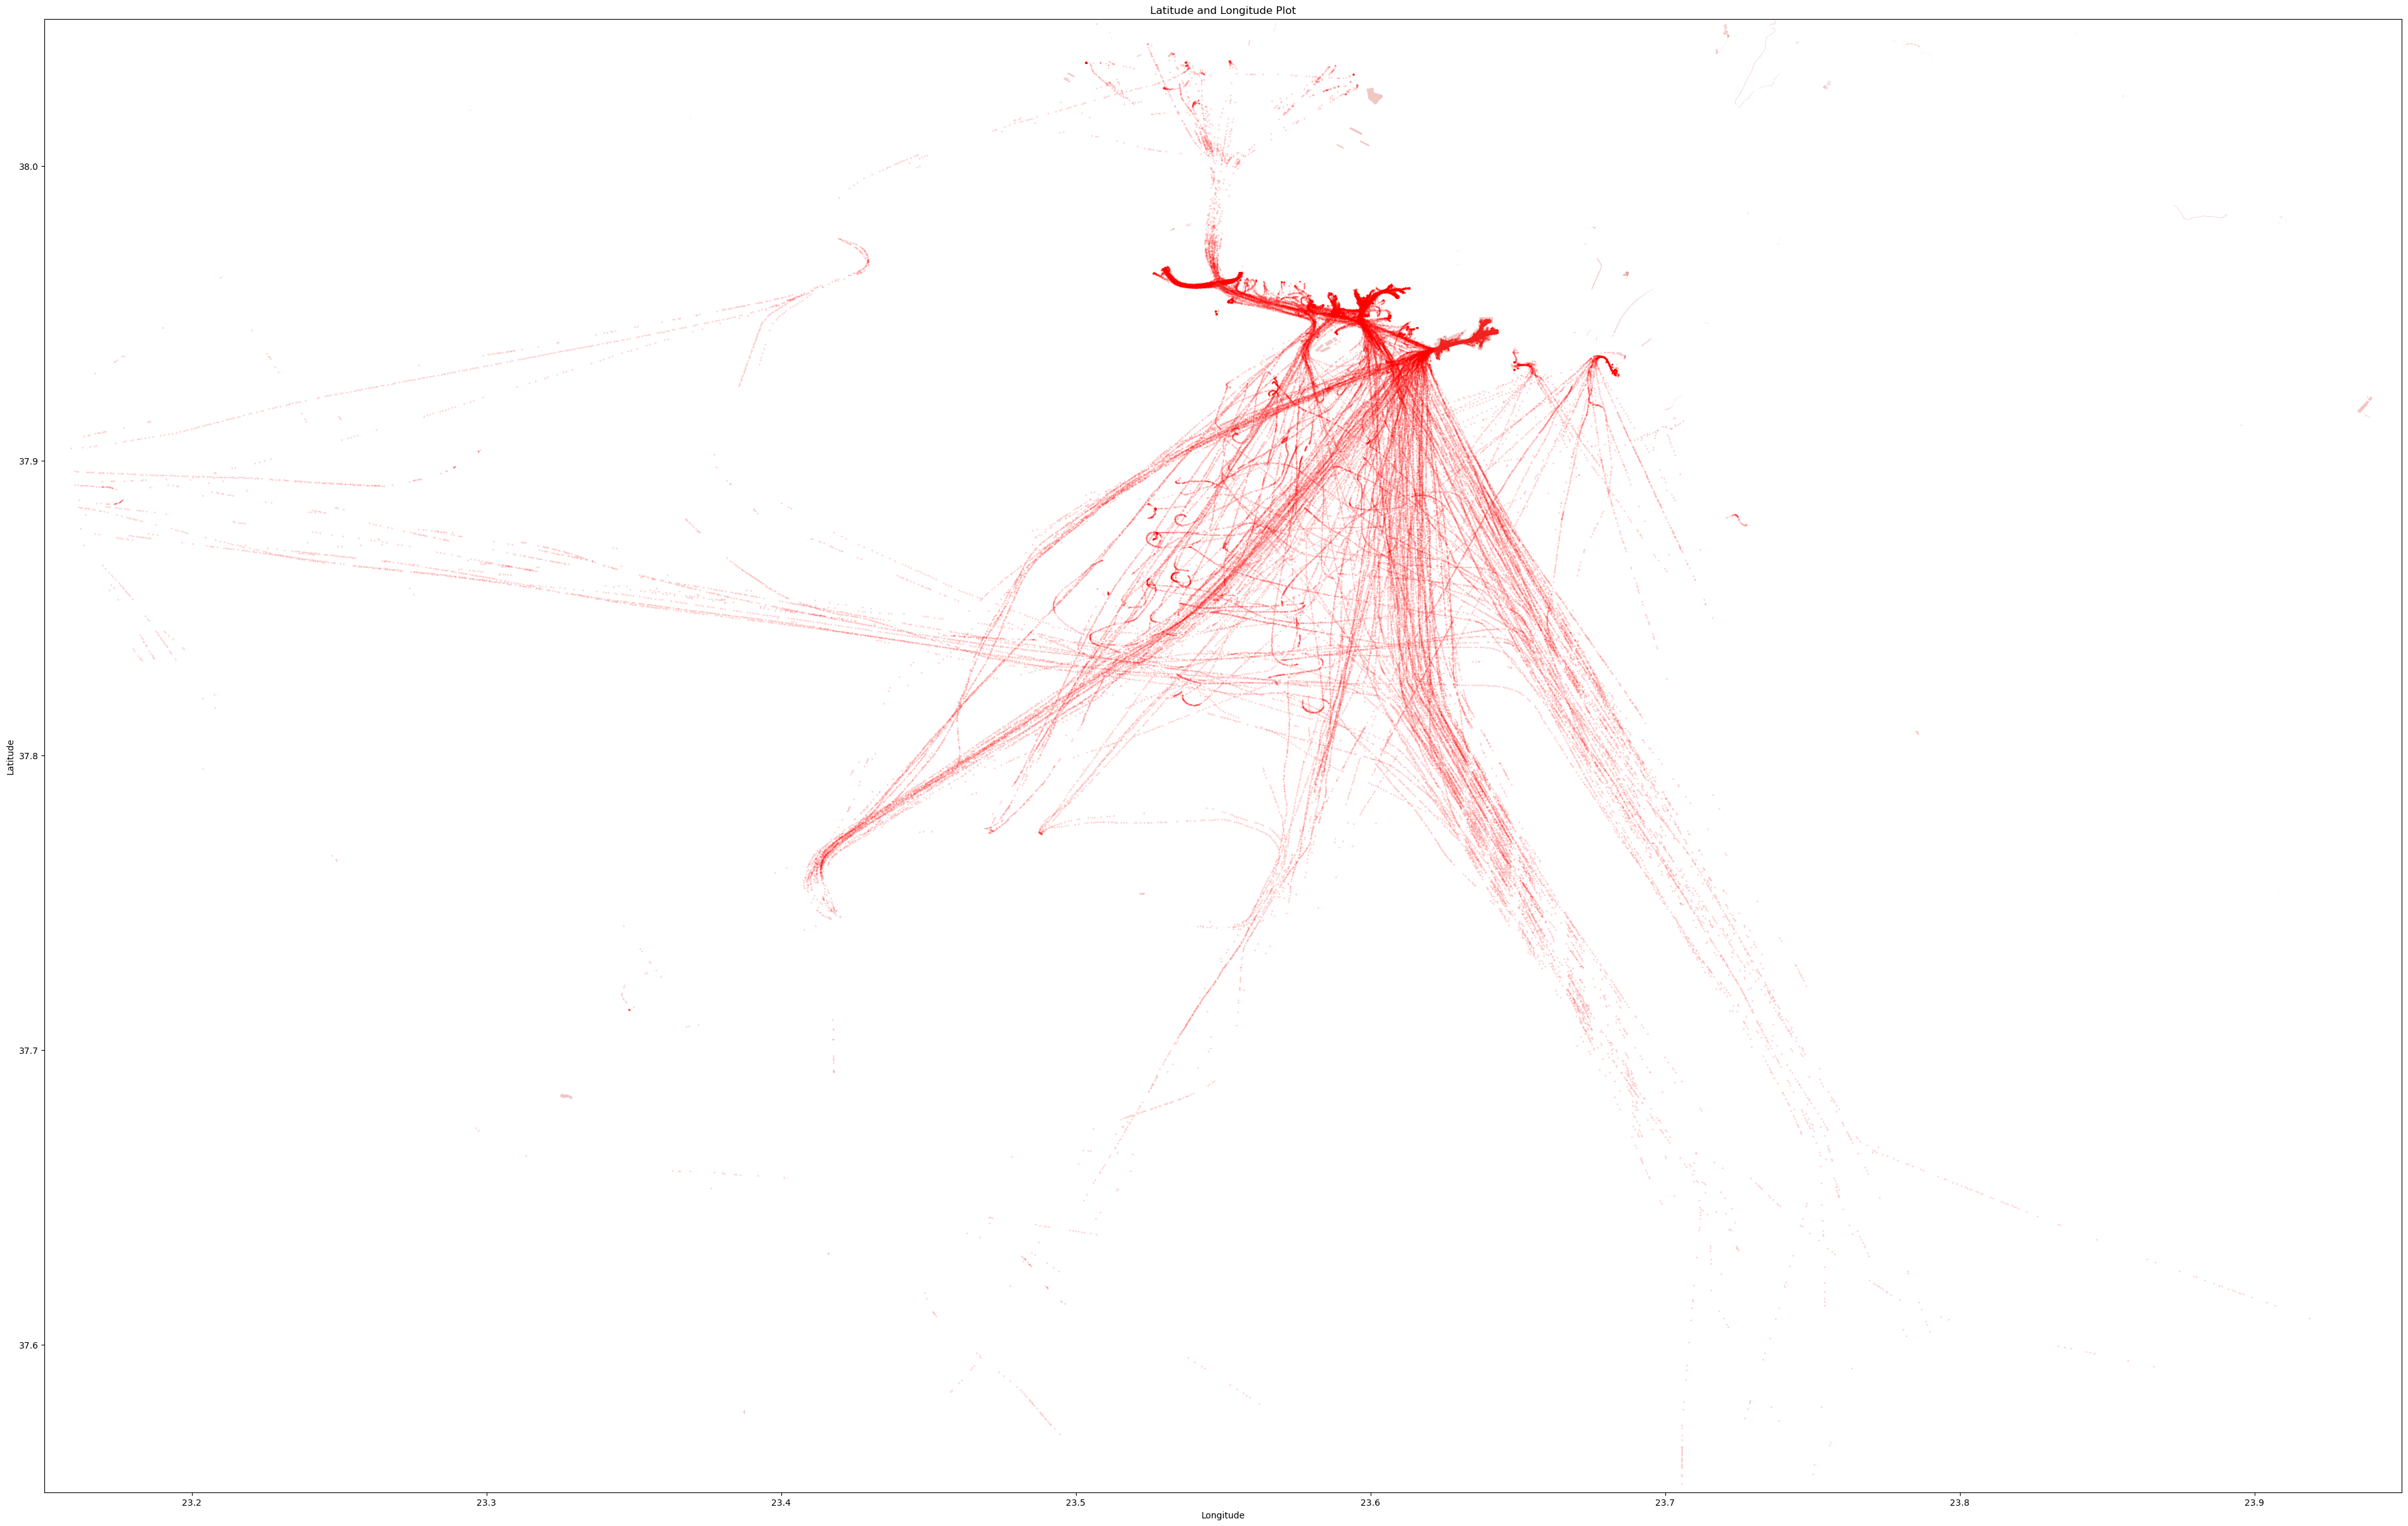

In [25]:
# Visual check for whether all ship positions fall on water and not on land
# Create a GeoDataFrame with Point geometries
geometry = [Point(xy) for xy in zip(gdf_sub_moving.lon, gdf_sub_moving.lat)]
geo_df = gpd.GeoDataFrame(geometry=geometry)

wardlink = 'gis_osm_water_a_free_1.shp'  # shapefile path
ward = gpd.read_file(wardlink)

# Plot the ward boundaries
ax = ward.plot(alpha=0.35, color='#d66058', zorder=13)

# Plot the markers (your latitude and longitude points)
ax = geo_df.plot(ax=ax, markersize=0.1, color='red', marker='.', zorder=1)

# Set the desired axis limits (adjust these values as needed)
ax.set_xlim(xmin=23.15, xmax=23.95)
ax.set_ylim(ymin=37.55, ymax=38.05)

# Increase the figure size
fig = plt.gcf()
fig.set_size_inches(48, 40)  # 24 inches wide, 20 inches tall
plt.title("Latitude and Longitude Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add an OpenStreetMap basemap
# ctx.add_basemap(ax, crs="epsg:4326", source=ctx.providers.OpenStreetMap.Mapnik, zoom=19)
ctx.add_basemap(ax, crs="epsg:4326", source=ctx.providers.Esri.WorldShadedRelief, zoom=13)